In [1]:
import numpy as np 
import pandas as pd
import keras
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv("../data/Sentiment.csv/Sentiment.csv")

In [3]:
df.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [4]:
df.sentiment.unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [5]:
df.sentiment.value_counts()

Negative    8493
Neutral     3142
Positive    2236
Name: sentiment, dtype: int64

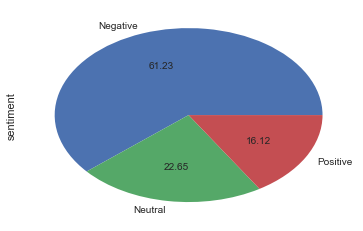

In [6]:
df.sentiment.value_counts().plot.pie(autopct="%.2f")

In [7]:
df.text[:2]

0    RT @NancyLeeGrahn: How did everyone feel about...
1    RT @ScottWalker: Didn't catch the full #GOPdeb...
Name: text, dtype: object

In [8]:
df.retweet_count.max()

4965

In [9]:
top_tweets = df.loc[df.retweet_count > 1000, ["text", "sentiment"]]

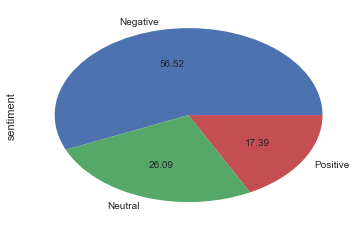

In [10]:
top_tweets.sentiment.value_counts().plot.pie(autopct="%.2f")

In [11]:
# Can have some egde use cases, so please search for RT and then apply 
def process(text):
    split_text = text.split(":")[0].split("@")[-1]
    return split_text

In [12]:
top_tweets["person"] = top_tweets.text.apply(lambda x : process(x))

In [13]:
top_tweets

,text,sentiment,person
29,RT @HillaryClinton: Watch the #GOPdebate? Bet ...,Negative,HillaryClinton
37,"RT @kvxrdashian: Jeb Bush: ""Obama is at fault,...",Negative,kvxrdashian
41,"RT @JamelleMyBelle: Meanwhile, in the White Ho...",Negative,JamelleMyBelle
45,RT @LeKarmaSucre: How the #GOPDebate handled #...,Negative,LeKarmaSucre
65,RT @frankthorpNBC: The Rand Paul eye roll to C...,Neutral,frankthorpNBC
83,"RT @tedcruz: If elected, on my first day as Pr...",Positive,tedcruz
128,"RT @pattonoswalt: ""Have any of you received a ...",Neutral,pattonoswalt
131,RT @HillaryClinton: Missing Jon Stewart alread...,Neutral,HillaryClinton
152,"RT @sallykohn: Hey look, it’s 10 men standing ...",Negative,sallykohn
175,RT @BHowl_: How come there's no talk about cli...,Negative,BHowl_


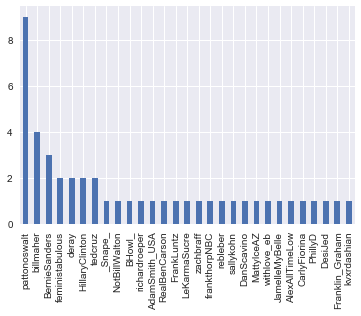

In [14]:
top_tweets.person.value_counts().plot.bar()

In [15]:
pd.crosstab(top_tweets.sentiment, top_tweets.person)

person,AdamSmith_USA,AlexAllTimeLow,BHowl_,BernieSanders,CarlyFiorina,DanScavino,DesiJed,FrankLuntz,Franklin_Graham,HillaryClinton,...,feministabulous,frankthorpNBC,kvxrdashian,pattonoswalt,rebleber,richardroeper,sallykohn,tedcruz,withlove_eb,zachbraff
sentiment,,,,,,,,,,,,,,,,,,,,,
Negative,1,0,1,2,0,0,0,0,0,1,...,2,0,1,5,1,0,1,0,1,0
Neutral,0,1,0,0,1,0,1,0,0,1,...,0,1,0,3,0,1,0,1,0,1
Positive,0,0,0,1,0,1,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0


In [16]:
pos_tweets = df.loc[df.sentiment == "Positive", ["text", "retweet_count"]]

In [17]:
# pos_tweets["person"] = pos_tweets.text.apply(lambda x: process(x))

In [18]:
pos_tweets.sort_values("retweet_count", ascending=False)[:5]

,text,retweet_count
249,RT @BernieSanders: Tom Hanks. Finally. Somebod...,4270
409,RT @RealBenCarson: May the Lord guide my words...,3469
872,"RT @PhillyD: I went to a gay wedding. \n""Appla...",1972
83,"RT @tedcruz: If elected, on my first day as Pr...",1449
181,RT @DanScavino: #GOPDebate Winner!\nDrudge 50%...,1395


### Coming back to DL - Text preprocessing

In [19]:
df.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [20]:
test = "Python Linux Mac"

In [21]:
test.lower()

'python linux mac'

In [22]:
df.text = df.text.str.lower()

In [23]:
import re

In [24]:
test_tweets = df.loc[0, "text"]

In [25]:
test_tweets

'rt @nancyleegrahn: how did everyone feel about the climate change question last night? exactly. #gopdebate'

In [26]:
re.sub('[^a-zA-Z0-9\s]', "", test_tweets)

'rt nancyleegrahn how did everyone feel about the climate change question last night exactly gopdebate'

In [27]:
df.text = df.text.str.replace("rt ", "")

In [28]:
df.text[:5]

0    @nancyleegrahn: how did everyone feel about th...
1    @scottwalker: didn't catch the full #gopdebate...
2    @tjmshow: no mention of tamir rice and the #go...
3    @robgeorge: that carly fiorina is trending -- ...
4    @danscavino: #gopdebate w/ @realdonaldtrump de...
Name: text, dtype: object

In [29]:
import nltk

In [30]:
from nltk.corpus import stopwords

In [31]:
eng_stopwords = list(set(stopwords.words("english")))

In [32]:
eng_stopwords[:5]

['am', 'can', 'because', 'where', 'on']

In [33]:
def stop_word_removal(text):
    words = text.split(" ")
    non_stop_words = [word for word in words if word not in eng_stopwords]
    return " ".join(non_stop_words)

In [34]:
df.text = df.text.apply(lambda x: stop_word_removal(x))

In [35]:
df.text = df.text.apply(lambda x: re.sub("[^a-zA-Z0-9\s]", "", x))

In [36]:
df.text

0        nancyleegrahn everyone feel climate change que...
1        scottwalker catch full gopdebate last night sc...
2        tjmshow mention tamir rice gopdebate held clev...
3        robgeorge carly fiorina trending  hours debate...
4        danscavino gopdebate w realdonaldtrump deliver...
5        gregabbotttx tedcruz on first day rescind ever...
6        warriorwoman91 liked happy heard going moderat...
7        going msnbc live thomasaroberts around 2 pm et...
8        deer headlights lizzwinstead ben carson may br...
9        nancyosborne180 last nights debate proved it g...
10       jgreendc realdonaldtrump fairness billclinton ...
11       waynedupreeshow woke tweet gopdebate \n\nbest ...
12       reading familys comments great gopdebate httpt...
13       arcticfox2016 allenwestrepub dear jebbush gopd...
14       pattonoswalt loved scott walker mark harmons r...
15       hey chrischristie exploiting tragedy 911 polit...
16       carolcnn donaldtrump fire comments women peter.

### Natural Language Processing 

In [37]:
import keras

In [38]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [39]:
max_feature = 2000 
tokenizer = Tokenizer(num_words=max_feature)

In [40]:
tokenizer.fit_on_texts(df.text)

In [41]:
tokenizer.word_counts

OrderedDict([('nancyleegrahn', 6),
             ('everyone', 91),
             ('feel', 64),
             ('climate', 72),
             ('change', 84),
             ('question', 350),
             ('last', 884),
             ('night', 632),
             ('exactly', 22),
             ('gopdebate', 9008),
             ('scottwalker', 88),
             ('catch', 9),
             ('full', 44),
             ('scotts', 2),
             ('best', 185),
             ('lines', 14),
             ('90', 12),
             ('seconds', 15),
             ('walker16', 28),
             ('httptcozsff', 1),
             ('tjmshow', 1),
             ('mention', 56),
             ('tamir', 2),
             ('rice', 2),
             ('held', 10),
             ('cleveland', 37),
             ('wow', 53),
             ('robgeorge', 1),
             ('carly', 118),
             ('fiorina', 140),
             ('trending', 2),
             ('hours', 34),
             ('debate', 1048),
             ('men', 181),


In [42]:
X = tokenizer.texts_to_sequences(df.text)

In [43]:
X = pad_sequences(X)

In [44]:
X.shape

(13871, 24)

In [45]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 250, 358, 323, 271,  37,  10,  15, 940,   1])

In [46]:
word_index = tokenizer.word_index

In [47]:
# Tf-idf 
# Word Embedding 
    # Sementic Relationship 
        #(King - Queen) == (Men - Women) == (Girl - Boy)
    #word2vec(google) & glove (facebook)
#BERT - Bidirectional Encoder Representations from Transformers

#### Colah Blog - http://colah.github.io/posts/2015-08-Understanding-LSTMs/ 

In [48]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, SpatialDropout1D
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.activations import relu, softmax

In [49]:
model = Sequential()
model.add(Embedding(max_feature, 128, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(196, dropout=0.2))
model.add(Dense(3, activation="softmax"))

In [50]:
model.compile(loss=categorical_crossentropy, optimizer="adam", metrics=["acc"])

In [51]:
Y = pd.get_dummies(df.sentiment)

In [53]:
model.fit(X, Y, batch_size=64, epochs=5)

Epoch 1/5
13871/13871 [==============================] - 40s 3ms/step - loss: 0.6956 - acc: 0.6989
Epoch 2/5
13871/13871 [==============================] - 41s 3ms/step - loss: 0.6456 - acc: 0.7240
Epoch 3/5
 8704/13871 [=================>............] - ETA: 17s - loss: 0.6056 - acc: 0.7435

KeyboardInterrupt: 